from https://blog.csdn.net/i_am_huang/article/details/89207102

HBOS（Histogram-based Outlier Score）是一种原理简单，且通常很有效的无监督算法。该方法为每一个样本进行异常评分，评分越高越可能是异常点。评分模型为：

​                                       ![img](pics/20190411120114845.png)

假设样本*p*第 *i* 个特征的概率密度为 ，则*p*的概率密度可以计算为：

​                                       ![img](pics/20190411120208338.png)

两边取对数：

​                                    ![img](pics/20190411120222673.png)

概率密度越大，异常评分越小，则两边乘以“-1”：

​                                  ![img](pics/20190411120244826.png)

即：

​                                   ![img](pics/20190411120259269.png)

如何计算概率密度，特别是对于连续型数据？最简单的方法是对连续数据进行离散化。离散化的基本思想是设置“断点”，将数据分割成若干个区间。其中，“断点”的设置可以是静态的，也可以是动态的。

对于样本集***D\***，设置合适的“断点”集合，将特征的取值分割成若干个区间。统计区间的样本数，可以构建一个频数直方图***H\***。假设第 *i* 个特征分割成*m* 个区间，每个区间统计的样本个数分别为：

​                                              ![img](pics/20190411120316587.png)

频率（概率）分布表

| 取值 | 区间1                              | 区间2                              | ...... | 区间*m*                            |
| ---- | ---------------------------------- | ---------------------------------- | ------ | ---------------------------------- |
| 频率 | ![img](pics/20190411120358264.png) | ![img](pics/20190411120344607.png) | ...... | ![img](pics/20190411120426856.png) |

明显，根据频数直方图***H\***可以计算出所有特征的频率分布。

为什么频率越大，异常评分越小？

​                                   ![img](pics/20190411120438486.png)

​                                            特征*c*

上图是特征*c*的样本分布例图。直观上，B样本是异常点，A点是正常点。由于，样本*A*（样本*B*）关于特征*c*的概率密度估计可以用特征*c*在相应区间的频率来近似。显然，特征的取值频率越大，样本的关于该特征的异常评分越小。

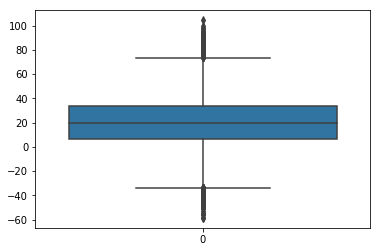

In [66]:
import pyod
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = np.random.randn(50000) * 20 + 20
sns.boxplot(data=data)


On Training Data:
HBOS ROC:0.9947, precision @ rank n:0.8

On Test Data:
HBOS ROC:0.9744, precision @ rank n:0.6


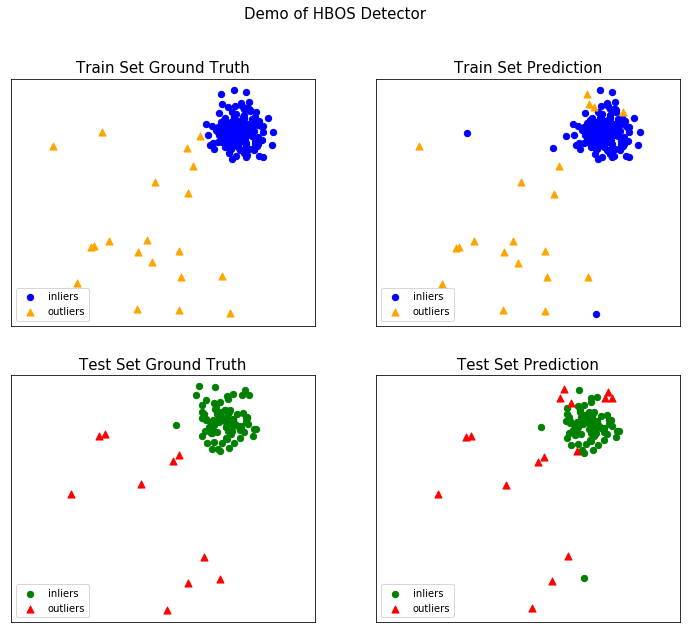

In [86]:
# -*- coding: utf-8 -*-
"""Example of using Histogram- based outlier detection (HBOS) for
outlier detection
"""
# Author: No Ashamed Copy from Yue Zhao <zhaoy@cmu.edu>
# License: BSD 2 clause

from pyod.models.hbos import HBOS
from pyod.utils.data import generate_data, generate_data_clusters
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

# if __name__ == "__main__":
contamination = 0.1  # percentage of outliers
n_train = 200  # number of training points
n_test = 100  # number of testing points

# Generate sample data
X_train, y_train, X_test, y_test = \
    generate_data(n_train=n_train,
                    n_test=n_test,
                    n_features=2,
                    contamination=contamination,
                    random_state=42)

# train HBOS detector
clf_name = 'HBOS'
clf = HBOS()
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)

# visualize the results
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
            y_test_pred, show_figure=True, save_figure=False)

In [87]:
x_outliers, x_inliers = pyod.utils.data.get_outliers_inliers(X_test,y_test)
n_inliers = len(x_inliers)
n_outliers = len(x_outliers)
n_inliers, n_outliers

(90, 10)

由上图看到，模型效果并不是很好，那么就开始调参
![](pics/2-1.jpg)
参数列表为：
- n_bins (int, optional (default=10)) – The number of bins.

- alpha (float in (0, 1), optional (default=0.1)) – The regularizer for preventing overflow.

- tol (float in (0, 1), optional (default=0.5)) – The parameter to decide the flexibility while dealing the samples falling outside the bins.

- contamination (float in (0., 0.5), optional (default=0.1)) – The amount of contamination of the data set, i.e. the proportion of outliers in the data set. Used when fitting to define the threshold on the decision function.

默认参数为：n_bins=10, alpha=0.1, tol=0.5, contamination=0.1


On Training Data:
HBOS ROC:1.0, precision @ rank n:1.0

On Test Data:
HBOS ROC:1.0, precision @ rank n:1.0


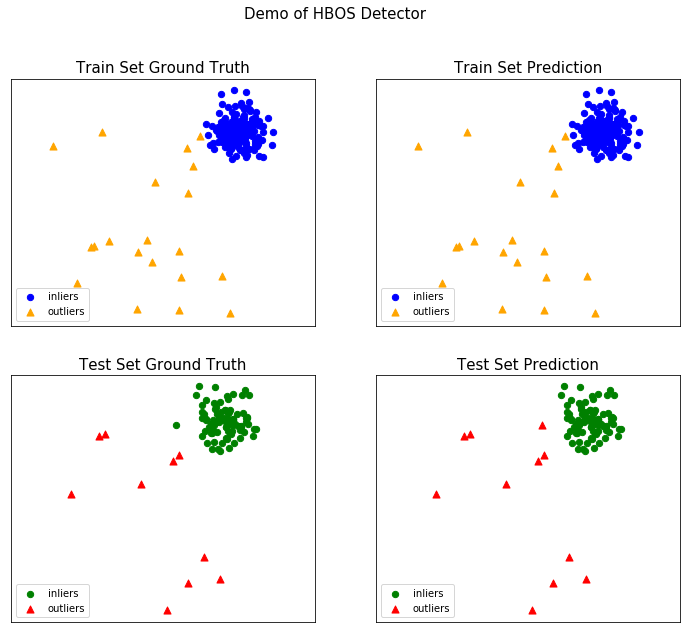

3.8856429754698487

In [88]:
# train HBOS detector
clf_name = 'HBOS'
clf = HBOS(n_bins=6, 
            alpha=0.1, 
            tol=0.5, 
            contamination=0.1)
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)

# visualize the results
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
            y_test_pred, show_figure=True, save_figure=False)

clf.threshold_

减少bins或者减少alpha都可以提高在工业界梦寐以求的结果，虽然这个是toy example……希望datawhale以后能有好的数据集做一期od的实战学习


On Training Data:
HBOS ROC:0.9741, precision @ rank n:0.9268

On Test Data:
HBOS ROC:0.9729, precision @ rank n:0.9444


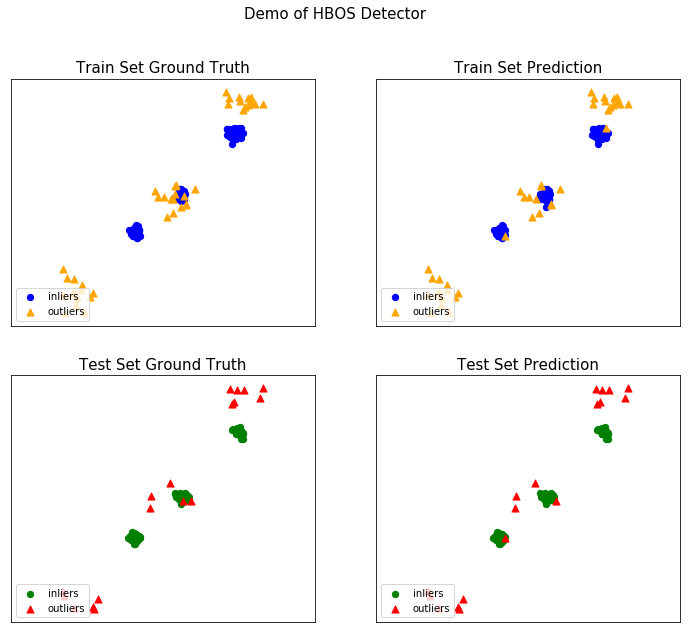

In [251]:
# if __name__ == "__main__":
contamination = 0.2  # percentage of outliers
n_train = 200  # number of training points
n_test = 100  # number of testing points

# Generate sample data
X_train,X_test, y_train,  y_test = \
    generate_data_clusters(n_train=n_train,
                  n_test=n_test,
                  n_features=2,
                  n_clusters=3,
                  contamination=contamination,
                  random_state=42)
# print(X_test)
# train HBOS detector
clf_name = 'HBOS'
clf = HBOS(n_bins=122,
            alpha=0.09, 
            tol=0.5, 
            contamination=0.2)
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores


# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)

# visualize the results
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
            y_test_pred, show_figure=True, save_figure=False)

n_bins对准确率影响较大，alpha影响较小
测试了，2簇和3簇的数据集之后发现，以上结论正确，且：n_bins在数据集越复杂的时候需要加大，alpha在此之上可以对过拟合进行优化，但是train和test之间差别并不大，此参数提高有限，另两个参数有待研究